In [1]:
import spacy
import pandas as pd
import numpy as np
from nltk.stem import PorterStemmer
import seaborn as sns
import matplotlib.pyplot as plt
import re
import string
from ekphrasis.classes.segmenter import Segmenter
from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator
import nltk
from textblob import TextBlob


In [2]:
df = pd.read_csv('recession_tweets_oct_dec_22.csv')

In [3]:
df.head()

Unnamed: 0                       Date             User  \
0           0  2022-12-13 23:47:18+00:00   NickMorenoLive   
1           1  2022-12-13 23:46:49+00:00  InvariantPersp1   
2           2  2022-12-13 23:46:02+00:00     FXStreetNews   
3           3  2022-12-13 23:37:23+00:00      Frugalology   
4           4  2022-12-13 23:36:55+00:00        FrugalMag   

                                               Tweet  likeCount  replyCount  \
0  They are barking loud now that they can't pay ...          0           0   
1  #recession ... #GFC2 US #CPI #Consumer #Inflat...          2           0   
2  GBP/JPY eyes downside to near 167.00 as furthe...          2           0   
3  Frugal Tips on How to Save Money on Groceries ...          0           0   
4  Frugal Tips on How to Save Money on Groceries ...          0           0   

   retweetCount       location  
0             0  United States  
1             0            NaN  
2             0      Barcelona  
3             0          Texas  
4             0          Texas

In [4]:
df.shape

(34850, 8)

In [5]:
source_nlp = spacy.load('en_core_web_sm')
seg_tw = Segmenter(corpus= "twitter")


Reading twitter - 1grams ...
Reading twitter - 2grams ...


/Users/akanksha/opt/anaconda3/envs/Ml/lib/python3.9/site-packages/ekphrasis/classes/exmanager.py:14: FutureWarning: Possible nested set at position 42
  regexes = {k.lower(): re.compile(self.expressions[k]) for k, v in


In [6]:
df.describe()

Unnamed: 0     likeCount    replyCount  retweetCount
count  34850.000000  34850.000000  34850.000000  34850.000000
mean   17424.500000      4.146772      0.542669      1.058049
std    10060.472777     51.451684      5.858551     10.836371
min        0.000000      0.000000      0.000000      0.000000
25%     8712.250000      0.000000      0.000000      0.000000
50%    17424.500000      0.000000      0.000000      0.000000
75%    26136.750000      1.000000      0.000000      0.000000
max    34849.000000   4696.000000    439.000000   1103.000000

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34850 entries, 0 to 34849
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    34850 non-null  int64 
 1   Date          34850 non-null  object
 2   User          34850 non-null  object
 3   Tweet         34850 non-null  object
 4   likeCount     34850 non-null  int64 
 5   replyCount    34850 non-null  int64 
 6   retweetCount  34850 non-null  int64 
 7   location      22019 non-null  object
dtypes: int64(4), object(4)
memory usage: 2.1+ MB


In [8]:
df['Date_'] = pd.to_datetime(df['Date'])

In [9]:
df['month'] = df['Date_'].dt.month

In [10]:
df['month'].value_counts()

10    15037
11    14498
12     5315
Name: month, dtype: int64

In [11]:
df['month'].unique()

array([12, 11, 10])

In [12]:
a = dict(df['month'].value_counts())
a.keys()

dict_keys([10, 11, 12])

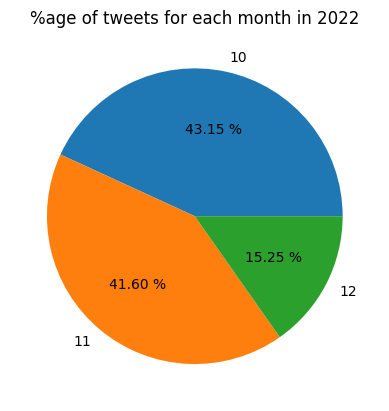

In [13]:
plt.pie(a.values(),labels =a.keys(),autopct = '%.2f %%' )
plt.title('%age of tweets for each month in 2022')
plt.show()


In [14]:
df

Unnamed: 0                       Date             User  \
0               0  2022-12-13 23:47:18+00:00   NickMorenoLive   
1               1  2022-12-13 23:46:49+00:00  InvariantPersp1   
2               2  2022-12-13 23:46:02+00:00     FXStreetNews   
3               3  2022-12-13 23:37:23+00:00      Frugalology   
4               4  2022-12-13 23:36:55+00:00        FrugalMag   
...           ...                        ...              ...   
34845       34845  2022-10-01 00:29:26+00:00     Nippi25James   
34846       34846  2022-10-01 00:25:54+00:00     Wealth_Nodes   
34847       34847  2022-10-01 00:16:46+00:00     MortgageMark   
34848       34848  2022-10-01 00:07:54+00:00      haqsmusings   
34849       34849  2022-10-01 00:05:20+00:00    AnalyticalCow   

                                                   Tweet  likeCount  \
0      They are barking loud now that they can't pay ...          0   
1      #recession ... #GFC2 US #CPI #Consumer #Inflat...          2   
2      GBP/JPY eyes downside to near 167.00 as furthe...          2   
3      Frugal Tips on How to Save Money on Groceries ...          0   
4      Frugal Tips on How to Save Money on Groceries ...          0   
...                                                  ...        ...   
34845  I’m so poor, I can’t even pay attention! #Mini...          0   
34846  Stanley Black and Decker cut about 1000 financ...          0   
34847  Prepare yourself accordingly #recession #canad...          1   
34848  #India central bank chief Das raises interest ...          1   
34849  RECESSION &amp; INFLATION centered tweets for ...          0   

       replyCount  retweetCount                  location  \
0               0             0             United States   
1               0             0                       NaN   
2               0             0                 Barcelona   
3               0             0                     Texas   
4               0             0                     Texas   
...           ...           ...                       ...   
34845           0             0                        UK   
34846           0             0                       NaN   
34847           0             0  Burnaby, BC, CA, V5E 4G2   
34848           0             0        Silicon Valley, CA   
34849           0             0                       NaN   

                          Date_  month  
0     2022-12-13 23:47:18+00:00     12  
1     2022-12-13 23:46:49+00:00     12  
2     2022-12-13 23:46:02+00:00     12  
3     2022-12-13 23:37:23+00:00     12  
4     2022-12-13 23:36:55+00:00     12  
...                         ...    ...  
34845 2022-10-01 00:29:26+00:00     10  
34846 2022-10-01 00:25:54+00:00     10  
34847 2022-10-01 00:16:46+00:00     10  
34848 2022-10-01 00:07:54+00:00     10  
34849 2022-10-01 00:05:20+00:00     10  

[34850 rows x 10 columns]

In [15]:
df.replyCount.unique

<bound method Series.unique of 0        0
1        0
2        0
3        0
4        0
        ..
34845    0
34846    0
34847    0
34848    0
34849    0
Name: replyCount, Length: 34850, dtype: int64>

In [16]:
df.iloc[0]['Tweet']

"They are barking loud now that they can't pay even the interest on their debt. It will be interesting to see who Biden gives this company to when he bails em out.\n\n#BlackRock\n#recession \n#interestrates https://t.co/nkz2xnshoU"

In [17]:
df['hashtag'] = df['Tweet'].apply(lambda x : re.findall(r"#(\w+)",x))


In [18]:
tweet_All = " ".join(twe for twe in df.Tweet)
wordcloud_ALL = WordCloud(max_font_size=50, max_words=100, 
                          background_color="white").generate(tweet_All)

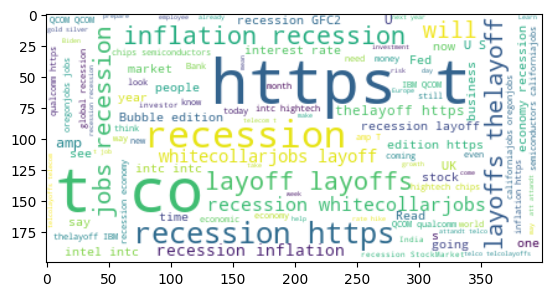

In [19]:
plt.imshow(wordcloud_ALL, interpolation='bilinear')

Preprocessing Tweets

In [20]:
#We need to remove these strings from our datset

In [21]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [22]:
def remove_punctuation(text):
    s = ''.join([a for a in text if a not in string.punctuation])
    s = re.sub('[0-9]+', '', s)
    s = re.sub(r"http\S+", "", s)
    s = re.sub(r"https\S+", "", s)
    s = re.sub(r"www.\S+", "", s)
    s = re.sub('\\n\\n', "", s)
    s = s.lower()
    return(s)


In [23]:
df['Tweet_punc'] = df['Tweet'].apply(lambda x:remove_punctuation(x))

In [24]:
df['Tweet_Token'] = df['Tweet_punc'].apply(lambda x: re.split(r"(\w+)",x.lower()))

In [25]:
df['Tweet_Token']

0        [, they,  , are,  , barking,  , loud,  , now, ...
1        [, recession,   , gfc,  , us,  , cpi,  , consu...
2        [, gbpjpy,  , eyes,  , downside,  , to,  , nea...
3        [, frugal,  , tips,  , on,  , how,  , to,  , s...
4        [, frugal,  , tips,  , on,  , how,  , to,  , s...
                               ...                        
34845    [, i, ’, m,  , so,  , poor,  , i,  , can, ’, t...
34846    [, stanley,  , black,  , and,  , decker,  , cu...
34847    [, prepare,  , yourself,  , accordingly,  , re...
34848    [, india,  , central,  , bank,  , chief,  , da...
34849    [, recession,  , amp,  , inflation,  , centere...
Name: Tweet_Token, Length: 34850, dtype: object

In [26]:
stopwords = nltk.corpus.stopwords.words('english')

In [27]:
df['Tweet_Token'] = df['Tweet_Token'].apply(lambda x: ''.join([a for a in x if a not in stopwords]))

In [28]:
df['Tweet_Token']

0          barking loud    cant pay even  interest   de...
1        recession  gfc us cpi consumer inflation editi...
2        gbpjpy eyes downside  near    boe rate hike  b...
3        frugal tips    save money  groceries  inflatio...
4        frugal tips    save money  groceries  inflatio...
                               ...                        
34845    ’  poor  ’ even pay attention minibudget pover...
34846    stanley black  decker cut   finance jobs part ...
34847               prepare  accordingly recession canada 
34848    india central bank chief das raises interest r...
34849    recession amp inflation centered tweets   past...
Name: Tweet_Token, Length: 34850, dtype: object

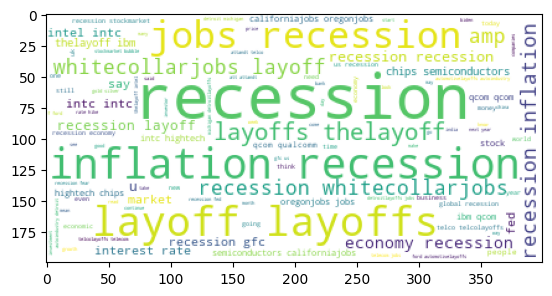

In [29]:
tweet_Token_All = " ".join(twe for twe in df.Tweet_Token)
wordcloud_Token_ALL = WordCloud(max_font_size=50, max_words=100, 
                          background_color="white").generate(tweet_Token_All)
plt.imshow(wordcloud_Token_ALL)

In [30]:
def remove_emoji(string):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

In [31]:
df['Tweet_Token'] = df['Tweet_Token'].apply(lambda x : remove_emoji(x))

In [32]:
ps = nltk.PorterStemmer()
ps.stem(df['Tweet_Token'][0])

'  barking loud    cant pay even  interest   debt    interesting  see  biden gives  company    bails em outblackrock\nrecession \ninterestrates '

In [33]:
def stemmer(string):
    return(ps.stem(string))
df['Twitter_stem'] = df['Tweet_Token'].apply(lambda x : stemmer(x))

In [34]:
def lemmatization(string):
    return(wl.lemmatize(string))

In [35]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/akanksha/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [36]:
wl = nltk.WordNetLemmatizer()
df['Tweet_Lemma'] = df['Tweet_Token'].apply(lambda x :lemmatization(x) )

In [37]:
df.head(10)

Unnamed: 0                       Date             User  \
0           0  2022-12-13 23:47:18+00:00   NickMorenoLive   
1           1  2022-12-13 23:46:49+00:00  InvariantPersp1   
2           2  2022-12-13 23:46:02+00:00     FXStreetNews   
3           3  2022-12-13 23:37:23+00:00      Frugalology   
4           4  2022-12-13 23:36:55+00:00        FrugalMag   
5           5  2022-12-13 23:16:47+00:00  JointVentureSVN   
6           6  2022-12-13 23:12:54+00:00           DB_WTI   
7           7  2022-12-13 23:09:43+00:00     FXStreetNews   
8           8  2022-12-13 22:57:14+00:00  Stock_Market_Pr   
9           9  2022-12-13 22:54:06+00:00       GachaMomma   

                                               Tweet  likeCount  replyCount  \
0  They are barking loud now that they can't pay ...          0           0   
1  #recession ... #GFC2 US #CPI #Consumer #Inflat...          2           0   
2  GBP/JPY eyes downside to near 167.00 as furthe...          2           0   
3  Frugal Tips on How to Save Money on Groceries ...          0           0   
4  Frugal Tips on How to Save Money on Groceries ...          0           0   
5  “When the pandemic came along, we all thought ...          2           0   
6  #OOTT #WTI \nImplication 1 could be due to the...          0           0   
7  USD/CHF senses barricades around 0.9300 as les...          2           0   
8  BlackRock: #Recession Coming, Not Priced Into ...          0           0   
9  #recession \n\nLettuce this small shouldn’t co...          0           0   

   retweetCount       location                     Date_  month  \
0             0  United States 2022-12-13 23:47:18+00:00     12   
1             0            NaN 2022-12-13 23:46:49+00:00     12   
2             0      Barcelona 2022-12-13 23:46:02+00:00     12   
3             0          Texas 2022-12-13 23:37:23+00:00     12   
4             0          Texas 2022-12-13 23:36:55+00:00     12   
5             1   San Jose, CA 2022-12-13 23:16:47+00:00     12   
6             0  United States 2022-12-13 23:12:54+00:00     12   
7             0      Barcelona 2022-12-13 23:09:43+00:00     12   
8             0            NaN 2022-12-13 22:57:14+00:00     12   
9             0            NaN 2022-12-13 22:54:06+00:00     12   

                                             hashtag  \
0              [BlackRock, recession, interestrates]   
1  [recession, GFC2, CPI, Consumer, Inflation, de...   
2           [GBPJPY, BOE, BOJ, Recession, Inflation]   
3  [frugal, frugaltips, inflation, recession, sav...   
4  [frugal, frugaltips, inflation, recession, sav...   
5                         [economy, recession, tech]   
6             [OOTT, WTI, recession, inflation, CPI]   
7           [USDCHF, Fed, SNB, Recession, Inflation]   
8                                [Recession, stocks]   
9                                        [recession]   

                                          Tweet_punc  \
0  they are barking loud now that they cant pay e...   
1  recession  gfc us cpi consumer inflation editi...   
2  gbpjpy eyes downside to near  as further boe r...   
3  frugal tips on how to save money on groceries ...   
4  frugal tips on how to save money on groceries ...   
5  “when the pandemic came along we all thought i...   
6  oott wti \nimplication  could be due to the th...   
7  usdchf senses barricades around  as lesshawkis...   
8  blackrock recession coming not priced into sto...   
9  recession lettuce this small shouldn’t cost  c...   

                                         Tweet_Token  \
0    barking loud    cant pay even  interest   de...   
1  recession  gfc us cpi consumer inflation editi...   
2  gbpjpy eyes downside  near    boe rate hike  b...   
3  frugal tips    save money  groceries  inflatio...   
4  frugal tips    save money  groceries  inflatio...   
5  “  pandemic came along   thought   going    cr...   
6  oott wti \nimplication  could  due   threat  r...   
7  usdchf senses barricades around   less

In [38]:
df[df['User'].str.contains('frugal',regex = True,case = False)][['User','hashtag']]

User                                            hashtag
3          Frugalology  [frugal, frugaltips, inflation, recession, sav...
4            FrugalMag  [frugal, frugaltips, inflation, recession, sav...
23888  frugal_friends_        [Minimalist, recession, MoneyTalks, frugal]
26364        StuFrugal                                        [recession]
26375  frugal_friends_        [Minimalist, recession, MoneyTalks, frugal]
27189  frugal_friends_        [Minimalist, recession, MoneyTalks, frugal]

In [39]:
def remove_hashtag_like_username(string):
    final = ''
    #print(string[0],string[1])
    for wrd in string[0]:
        
        if re.search(wrd+'\w+',string[1],re.IGNORECASE):
            continue
        else:
            
            final = final + ' ' + wrd
    return(final)

In [40]:
df['hashtag'] = df[['hashtag','User']].apply(remove_hashtag_like_username,axis = 1)

In [41]:
df.head()

Unnamed: 0                       Date             User  \
0           0  2022-12-13 23:47:18+00:00   NickMorenoLive   
1           1  2022-12-13 23:46:49+00:00  InvariantPersp1   
2           2  2022-12-13 23:46:02+00:00     FXStreetNews   
3           3  2022-12-13 23:37:23+00:00      Frugalology   
4           4  2022-12-13 23:36:55+00:00        FrugalMag   

                                               Tweet  likeCount  replyCount  \
0  They are barking loud now that they can't pay ...          0           0   
1  #recession ... #GFC2 US #CPI #Consumer #Inflat...          2           0   
2  GBP/JPY eyes downside to near 167.00 as furthe...          2           0   
3  Frugal Tips on How to Save Money on Groceries ...          0           0   
4  Frugal Tips on How to Save Money on Groceries ...          0           0   

   retweetCount       location                     Date_  month  \
0             0  United States 2022-12-13 23:47:18+00:00     12   
1             0            NaN 2022-12-13 23:46:49+00:00     12   
2             0      Barcelona 2022-12-13 23:46:02+00:00     12   
3             0          Texas 2022-12-13 23:37:23+00:00     12   
4             0          Texas 2022-12-13 23:36:55+00:00     12   

                                             hashtag  \
0                  BlackRock recession interestrates   
1   recession GFC2 CPI Consumer Inflation deflati...   
2                 GBPJPY BOE BOJ Recession Inflation   
3   frugaltips inflation recession savemoneyongro...   
4   frugaltips inflation recession savemoneyongro...   

                                          Tweet_punc  \
0  they are barking loud now that they cant pay e...   
1  recession  gfc us cpi consumer inflation editi...   
2  gbpjpy eyes downside to near  as further boe r...   
3  frugal tips on how to save money on groceries ...   
4  frugal tips on how to save money on groceries ...   

                                         Tweet_Token  \
0    barking loud    cant pay even  interest   de...   
1  recession  gfc us cpi consumer inflation editi...   
2  gbpjpy eyes downside  near    boe rate hike  b...   
3  frugal tips    save money  groceries  inflatio...   
4  frugal tips    save money  groceries  inflatio...   

                                        Twitter_stem  \
0    barking loud    cant pay even  interest   de...   
1  recession  gfc us cpi consumer inflation editi...   
2  gbpjpy eyes downside  near    boe rate hike  b...   
3  frugal tips    save money  groceries  inflatio...   
4  frugal tips    save money  groceries  inflatio...   

                                         Tweet_Lemma  
0    barking loud    cant pay even  interest   de...  
1  recession  gfc us cpi consumer inflation editi...  
2  gbpjpy eyes downside  near    boe rate hike  b...  
3  frugal tips    save money  groceries  inflatio...  
4  frugal tips    save money  groceries  inflatio...

In [42]:
df['sentiment'] = df['Tweet_Token'].apply(lambda x: TextBlob(x).sentiment.polarity)
df.head()

Unnamed: 0                       Date             User  \
0           0  2022-12-13 23:47:18+00:00   NickMorenoLive   
1           1  2022-12-13 23:46:49+00:00  InvariantPersp1   
2           2  2022-12-13 23:46:02+00:00     FXStreetNews   
3           3  2022-12-13 23:37:23+00:00      Frugalology   
4           4  2022-12-13 23:36:55+00:00        FrugalMag   

                                               Tweet  likeCount  replyCount  \
0  They are barking loud now that they can't pay ...          0           0   
1  #recession ... #GFC2 US #CPI #Consumer #Inflat...          2           0   
2  GBP/JPY eyes downside to near 167.00 as furthe...          2           0   
3  Frugal Tips on How to Save Money on Groceries ...          0           0   
4  Frugal Tips on How to Save Money on Groceries ...          0           0   

   retweetCount       location                     Date_  month  \
0             0  United States 2022-12-13 23:47:18+00:00     12   
1             0            NaN 2022-12-13 23:46:49+00:00     12   
2             0      Barcelona 2022-12-13 23:46:02+00:00     12   
3             0          Texas 2022-12-13 23:37:23+00:00     12   
4             0          Texas 2022-12-13 23:36:55+00:00     12   

                                             hashtag  \
0                  BlackRock recession interestrates   
1   recession GFC2 CPI Consumer Inflation deflati...   
2                 GBPJPY BOE BOJ Recession Inflation   
3   frugaltips inflation recession savemoneyongro...   
4   frugaltips inflation recession savemoneyongro...   

                                          Tweet_punc  \
0  they are barking loud now that they cant pay e...   
1  recession  gfc us cpi consumer inflation editi...   
2  gbpjpy eyes downside to near  as further boe r...   
3  frugal tips on how to save money on groceries ...   
4  frugal tips on how to save money on groceries ...   

                                         Tweet_Token  \
0    barking loud    cant pay even  interest   de...   
1  recession  gfc us cpi consumer inflation editi...   
2  gbpjpy eyes downside  near    boe rate hike  b...   
3  frugal tips    save money  groceries  inflatio...   
4  frugal tips    save money  groceries  inflatio...   

                                        Twitter_stem  \
0    barking loud    cant pay even  interest   de...   
1  recession  gfc us cpi consumer inflation editi...   
2  gbpjpy eyes downside  near    boe rate hike  b...   
3  frugal tips    save money  groceries  inflatio...   
4  frugal tips    save money  groceries  inflatio...   

                                         Tweet_Lemma  sentiment  
0    barking loud    cant pay even  interest   de...        0.3  
1  recession  gfc us cpi consumer inflation editi...        0.0  
2  gbpjpy eyes downside  near    boe rate hike  b...        0.1  
3  frugal tips    save money  groceries  inflatio...        0.0  
4  frugal tips    save money  groceries  inflatio...        0.0

We can see that where 

# EDA

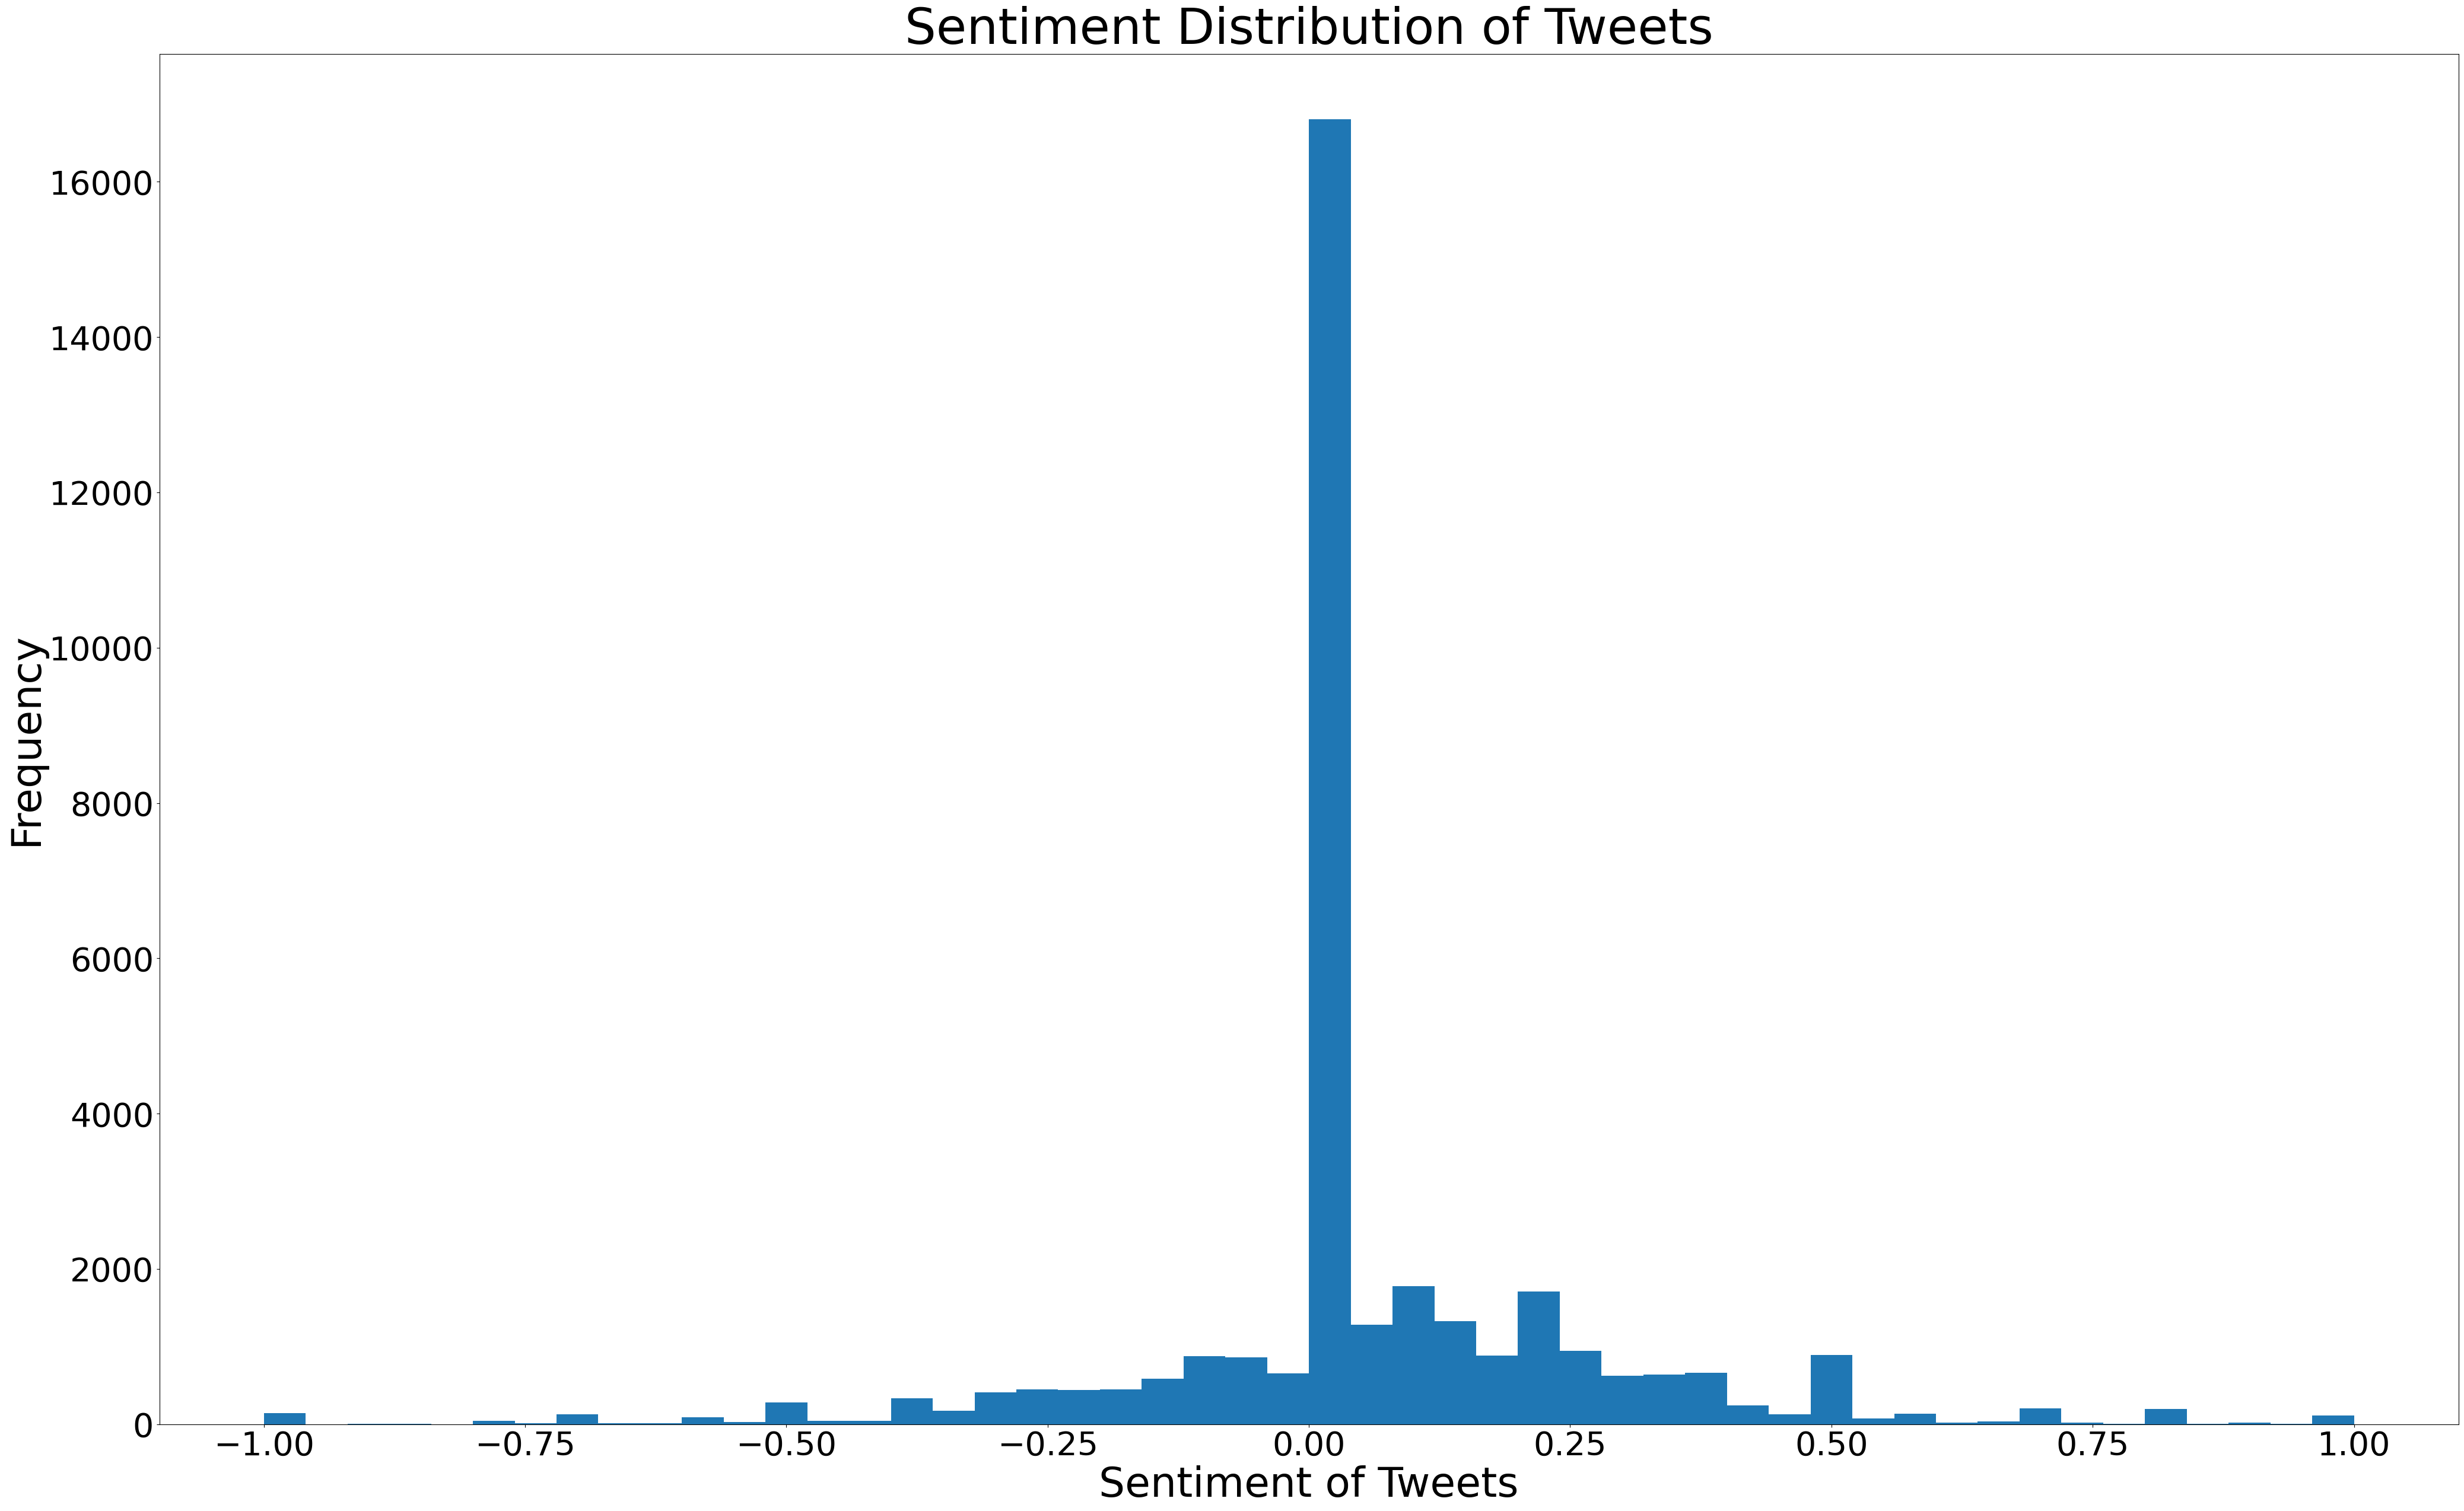

In [43]:
plt.figure(figsize=(50,30))
plt.hist(df['sentiment'], bins=50)

plt.xticks(fontsize=40)
plt.yticks(fontsize=40)

plt.xlabel('Sentiment of Tweets', fontsize=50)
plt.ylabel('Frequency', fontsize=50)
plt.title('Sentiment Distribution of Tweets', fontsize=60)
plt.show()

We can see that there are some tweets whose sentiment is 1. It's intersting to explore those tweets and see why they are there in the first place in the recession dataset.

### Analysis of Tweets where sentiment is 1

In [44]:
df[df['sentiment'] == max(df['sentiment'])]['Tweet']

511      With a #recession imminent it's the perfect ti...
560      Don't let a #recession ruin your #sales! \nThe...
582      Netflix stock is the ‘best recession play’ for...
703      Best Graphics of 2022, No. 19: The Biden clima...
1448     Recessions are the perfect time to move from a...
                               ...                        
32721    Posthaste: #Canada versus #USA — Which country...
32873    #Canada versus the #US: Which country will cou...
33183    Best guess $DXY 109-110 ➡️ 120-123, that is al...
33301    $FFIE perfect set up.\nCOME ON PEOPLE LET'S PU...
34577    The best domain name in the world is for sale ...
Name: Tweet, Length: 114, dtype: object

In [45]:
df.iloc[511]['Tweet']

"With a #recession imminent it's the perfect time to get an #ebike that doesn't require license, registration, or insurance to get around town. https://t.co/be409lkeVg"

In [46]:
df.iloc[560]['Tweet']

"Don't let a #recession ruin your #sales! \nThe #holiday season is coming up, and it's the perfect time to grow your #business. \n\nJoin us on December 15th at 3PM ET for our #webinar on Generating Sales During a Recession with Rebecca Parry, Sales Coach.\nhttps://t.co/mEKQSvsNlD"

In [47]:
df.iloc[1448]['Tweet']

'Recessions are the perfect time to move from a place of offense and strategy, not fear.\n\n#RecessionStrategy #OpportunityInRecession #BusinessAdaptability #OvercomingChallenges #SuccessInToughTimes #ForwardThinking #SurvivingRecession #ResilientBusiness #BusinessInsight #recession'

### Analysis of tweet where sentiment is -1

In [48]:
df[df['sentiment'] == min(df['sentiment'])]['Tweet']

356      https://t.co/szZG7A4j4p\nVMware\nWorst of the ...
656      Economy rebounds, outlook remains bleak\n#holi...
658      UK economy rebounds from royal funeral hit, ou...
717      Despite President Joe Biden championing his re...
1039     #BLACKROCK ALERT🚨: THE WORST #RECESSION in HIS...
                               ...                        
34204    Q3 Wrap Up - The 2nd Worst Year for Investors ...
34283    #ConservativesI I definitely the #nasty #party...
34418    Hey @POTUS , this is your idea of “not being i...
34550    Europe Faces WORST Energy Crisis in History!\n...
34815    https://t.co/Fvnrtw0PaY\n\nBiden is the worst ...
Name: Tweet, Length: 144, dtype: object

In [49]:
df.iloc[356]['Tweet']

'https://t.co/szZG7A4j4p\nVMware\nWorst of the worst\n#vmware #dell #broadcom $vmw #vmw #hightech #software #virtualization #virtualizationjobs #jobs #recession #whitecollarjobs #layoff #layoffs #thelayoff 🤖'

In [50]:
df.iloc[656]['Tweet']

'Economy rebounds, outlook remains bleak\n#holidayseason #Holidays #recession #queenelizabeth #uk @ONS #ONS #asiantrader #IndustryNews\nhttps://t.co/LHyBC2V2LR'

In [51]:
df.iloc[34418]['Tweet']

'Hey @POTUS , this is your idea of “not being in a #recession” ? Prices are insane and nothing is being done to fix it. https://t.co/8aNTPc7wFc'

In [52]:
df['Tweet_len'] = df['Tweet_Token'].astype(str).apply(len)

In [53]:
df['Tweet_len'].mean()

142.686456241033

Average length of the Tweet : 143 words

In [54]:
l = df['Tweet_Token']
all_words =[]
for word in l:
    all_words.append(word)


In [55]:
nltk.FreqDist(all_words).most_common(100)

[('real estate market mortgage modification property housing invest rent financial markets economy recession inflation realtor trdny ',
  152),
 ('recession  stockmarket bubble edition ', 130),
 ('recession  fed pushing   string edition ', 81),
 ('recession  global usd liquidity squeeze edition ', 81),
 ('register  us economic outlook  kpmg chief economist dianeswonk  share  views   economic landscape   rate hikes inflation   potential  recession economy recession inflation  ',
  77),
 ('interest rates going     federal reserves complacency  inflation   fallout  ppp loan forgiveness  going  lead us   recession inflation recession federalreserve  ',
  67),
 ('recession amp inflation centered tweets   past hrs  \nrecession  \ninflation   tomorrow',
  53),
 (' wonderful world kpmgus chief economist dianeswonk  released   economic outlook  looks    economy might play      sectors could  winners  losers economy inflation recession  ',
  46),
 ('recession  tech bubble  edition ', 46),
 ('rec

In [56]:
df[df['Tweet_Token'] == 'recession  tech bubble  edition ']

Unnamed: 0                       Date             User  \
497           497  2022-12-12 22:46:50+00:00  InvariantPersp1   
1011         1011  2022-12-12 00:06:59+00:00  InvariantPersp1   
1091         1091  2022-12-11 15:48:12+00:00  InvariantPersp1   
1273         1273  2022-12-10 19:20:38+00:00  InvariantPersp1   
2467         2467  2022-12-08 01:32:06+00:00  InvariantPersp1   
3663         3663  2022-12-06 00:19:31+00:00  InvariantPersp1   
5039         5039  2022-12-01 15:52:41+00:00  InvariantPersp1   
5220         5220  2022-12-01 06:23:08+00:00  InvariantPersp1   
5809         5809  2022-11-30 02:31:07+00:00  InvariantPersp1   
6754         6754  2022-11-28 00:29:09+00:00  InvariantPersp1   
6779         6779  2022-11-27 20:21:54+00:00  InvariantPersp1   
8796         8796  2022-11-21 20:19:00+00:00  InvariantPersp1   
10443       10443  2022-11-17 17:23:02+00:00  InvariantPersp1   
12439       12439  2022-11-14 15:20:15+00:00  InvariantPersp1   
13269       13269  2022-11-11 19:41:09+00:00  InvariantPersp1   
14362       14362  2022-11-10 00:42:04+00:00  InvariantPersp1   
15894       15894  2022-11-07 16:31:16+00:00  InvariantPersp1   
16128       16128  2022-11-07 07:27:18+00:00  InvariantPersp1   
16301       16301  2022-11-06 21:06:58+00:00  InvariantPersp1   
16589       16589  2022-11-05 21:47:40+00:00  InvariantPersp1   
17631       17631  2022-11-04 00:44:35+00:00  InvariantPersp1   
19327       19327  2022-11-01 22:41:34+00:00  InvariantPersp1   
19619       19619  2022-11-01 11:37:22+00:00  InvariantPersp1   
19887       19887  2022-10-31 19:13:48+00:00  InvariantPersp1   
20087       20087  2022-10-31 11:02:48+00:00  InvariantPersp1   
20294       20294  2022-10-30 15:52:22+00:00  InvariantPersp1   
20399       20399  2022-10-29 23:26:24+00:00  InvariantPersp1   
20743       20743  2022-10-28 15:18:43+00:00  InvariantPersp1   
20880       20880  2022-10-28 10:42:11+00:00  InvariantPersp1   
20887       20887  2022-10-28 10:35:00+00:00  InvariantPersp1   
21029       21029  2022-10-28 04:17:43+00:00  InvariantPersp1   
21298       21298  2022-10-27 15:32:46+00:00  InvariantPersp1   
21736       21736  2022-10-26 20:47:34+00:00  InvariantPersp1   
21739       21739  2022-10-26 20:45:59+00:00  InvariantPersp1   
21779       21779  2022-10-26 19:08:28+00:00  InvariantPersp1   
23575       23575  2022-10-22 22:10:17+00:00  InvariantPersp1   
23773       23773  2022-10-21 23:24:50+00:00  InvariantPersp1   
24645       24645  2022-10-20 14:16:56+00:00  InvariantPersp1   
25117       25117  2022-10-19 19:48:39+00:00  InvariantPersp1   
25363       25363  2022-10-19 13:12:07+00:00  InvariantPersp1   
25644       25644  2022-10-19 04:28:05+00:00  InvariantPersp1   
26183       26183  2022-10-18 08:45:59+00:00  InvariantPersp1   
26347       26347  2022-10-17 22:57:59+00:00  InvariantPersp1   
30148       30148  2022-10-11 11:42:45+00:00  InvariantPersp1   
30569       30569  2022-10-10 20:07:48+00:00  InvariantPersp1   
31776       31776  2022-10-07 14:15:45+00:00  InvariantPersp1   

                                                   Tweet  likeCount  \
497    #recession ... #Tech Bubble 2.0 edition https:...          4   
1011   #recession ... #Tech Bubble 2.0 edition https:...          2   
1091   #recession ... #Tech Bubble 2.0 edition https:...          2   
1273   #recession ... #Tech Bubble 2.0 edition https:...          7   
2467   #recession ... #Tech Bubble 2.0 edition https:...          2   
3663   #recession ... #Tech Bubble 2.0 edition https:...          0   
5039   #recession ... #Tech Bubble 2.0 edition https:...          1   
5220   #recession ... #Tech Bubble 2.0 edition https:...          0   
5809   #recession ... #Tech Bubble 2.0 edition https:...          2   
6754   #recession ... #Tech Bubble 2.0 edition https:...          2   
6779   #recession ... #Tech Bubble 3.0 edition https:...          1   
8796   #recession ... #Tech Bubble 2.0 edition https:...          0   
10443  #recession ... #Tech 

In [57]:
df.iloc[487]['Tweet']

"Unless you absolutely have to, better stay out of the market until #FOMC announces their rate hike on Wednesday. The market mostly thinks it's going to be 50bp. Until then, avoid being whipsawed #recession"

In [58]:
df.iloc[1011]['Tweet']

'#recession ... #Tech Bubble 2.0 edition https://t.co/6h25by6rGG'

In [59]:
df.iloc[1091]['Tweet']

'#recession ... #Tech Bubble 2.0 edition https://t.co/dY3WwH8u1h'

In [60]:
df.iloc[5220]['Tweet']

'#recession ... #Tech Bubble 2.0 edition https://t.co/zeKjJYtecb'

In [61]:
df.iloc[5809]['Tweet']

'#recession ... #Tech Bubble 2.0 edition https://t.co/6DG0dqoBs7'

In [62]:
df[df['Tweet_Token'] == 'real estate market mortgage modification property housing invest rent financial markets economy recession inflation realtor trdny ']

Unnamed: 0                       Date            User  \
271           271  2022-12-13 12:51:00+00:00  EquiMaxCapital   
479           479  2022-12-13 00:11:01+00:00  EquiMaxCapital   
601           601  2022-12-12 17:24:00+00:00  EquiMaxCapital   
748           748  2022-12-12 12:51:00+00:00  EquiMaxCapital   
1008         1008  2022-12-12 00:11:00+00:00  EquiMaxCapital   
...           ...                        ...             ...   
34069       34069  2022-10-03 11:51:00+00:00  EquiMaxCapital   
34262       34262  2022-10-02 23:12:00+00:00  EquiMaxCapital   
34419       34419  2022-10-02 14:43:00+00:00  EquiMaxCapital   
34671       34671  2022-10-01 16:24:00+00:00  EquiMaxCapital   
34740       34740  2022-10-01 11:51:01+00:00  EquiMaxCapital   

                                                   Tweet  likeCount  \
271    Real #Estate #Market #Mortgage #Modification #...          0   
479    Real #Estate #Market #Mortgage #Modification #...          0   
601    Real #Estate #Market #Mortgage #Modification #...          0   
748    Real #Estate #Market #Mortgage #Modification #...          0   
1008   Real #Estate #Market #Mortgage #Modification #...          0   
...                                                  ...        ...   
34069  Real #Estate #Market #Mortgage #Modification #...          0   
34262  Real #Estate #Market #Mortgage #Modification #...          0   
34419  Real #Estate #Market #Mortgage #Modification #...          0   
34671  Real #Estate #Market #Mortgage #Modification #...          0   
34740  Real #Estate #Market #Mortgage #Modification #...          0   

       replyCount  retweetCount             location  \
271             0             0  Washington DC Metro   
479             0             0  Washington DC Metro   
601             0             0  Washington DC Metro   
748             0             0  Washington DC Metro   
1008            0             0  Washington DC Metro   
...           ...           ...                  ...   
34069           0             0  Washington DC Metro   
34262           0             0  Washington DC Metro   
34419           0             0  Washington DC Metro   
34671           0             0  Washington DC Metro   
34740           0             0  Washington DC Metro   

                          Date_  month  \
271   2022-12-13 12:51:00+00:00     12   
479   2022-12-13 00:11:01+00:00     12   
601   2022-12-12 17:24:00+00:00     12   
748   2022-12-12 12:51:00+00:00     12   
1008  2022-12-12 00:11:00+00:00     12   
...                         ...    ...   
34069 2022-10-03 11:51:00+00:00     10   
34262 2022-10-02 23:12:00+00:00     10   
34419 2022-10-02 14:43:00+00:00     10   
34671 2022-10-01 16:24:00+00:00     10   
34740 2022-10-01 11:51:01+00:00     10   

                                                 hashtag  \
271     Estate Market Mortgage Modification Property ...   
479     Estate Market Mortgage Modification Property ...   
601     Estate Market Mortgage Modification Property ...   
748     Estate Market Mortgage Modification Property ...   
1008    Estate Market Mortgage Modification Property ...   
...                                                  ...   
34069   Estate Market Mortgage Modification Property ...   
34262   Estate Market Mortgage Modification Property ...   
34419   Estate Market Mortgage Modification Property ...   
34671   Estate Market Mortgage Modification Property ...   
34740   Estate Market Mortgage Modification Property ...   

                                              Tweet_punc  \
271    real estate market mortgage modification prope...   
479    real estate market mortgage modification prope...   
601    real estate market mortgage modification prope...   
748    real estate market mortgage modification prope...   
1008   real estate market mortgage modification prope...   
...                                                  ...   
34069  real estate market mortgage modification prope...   
34262 

In [63]:
df.iloc[271]['Tweet']

'Real #Estate #Market #Mortgage #Modification #Property #Housing #Invest #Rent #Financial #Markets #Economy #Recession #Inflation #Realtor #trdny https://t.co/qgh1xPWKyG'

In [64]:
df.iloc[34740]['Tweet']

'Real #Estate #Market #Mortgage #Modification #Property #Housing #Invest #Rent #Financial #Markets #Economy #Recession #Inflation #Realtor #trdny https://t.co/b1czBcoIbz'

After digging more into this. I found out that the Tweets from EquiMaxCapital are having all same hashtags. There's only difference in the article they are posting. Hence, we can delete those tweets.

In [65]:
newdf = df.drop_duplicates(
  subset = ['Tweet_Token', 'User'],
  keep = 'first').reset_index(drop = True).copy()

In [66]:
newdf.shape

(30673, 17)

In [67]:
all_words = ''.join(i for i in all_words if len(i)>3)

In [68]:
nltk.FreqDist(all_words).most_common(100)

[(' ', 850531),
 ('e', 486188),
 ('s', 361162),
 ('i', 328146),
 ('n', 321248),
 ('o', 320535),
 ('a', 284832),
 ('r', 274458),
 ('t', 274127),
 ('c', 205508),
 ('l', 184479),
 ('d', 122214),
 ('m', 111649),
 ('u', 98549),
 ('g', 98482),
 ('f', 94522),
 ('p', 92147),
 ('y', 82349),
 ('h', 80889),
 ('b', 71541),
 ('k', 55347),
 ('w', 49463),
 ('v', 39194),
 ('\n', 26212),
 ('j', 16883),
 ('x', 12557),
 ('q', 8071),
 ('z', 5044),
 ('’', 4742),
 ('🤖', 3049),
 ('“', 954),
 ('”', 908),
 ('…', 834),
 ('\xa0', 754),
 ('–', 613),
 ('‘', 609),
 ('—', 577),
 ('🤔', 222),
 ('\u200d', 181),
 ('•', 147),
 ('£', 140),
 ('🤣', 132),
 ('\u202f', 105),
 ('🤦', 96),
 ('⃣', 84),
 ('🧵', 68),
 ('ا', 49),
 ('ي', 49),
 ('🤡', 47),
 ('🤷', 43),
 ('ت', 39),
 ('\xad', 37),
 ('©', 36),
 ('\r', 36),
 ('🧐', 33),
 ('و', 32),
 ('🤯', 30),
 ('‼', 30),
 ('ل', 30),
 ('ك', 30),
 ('ر', 30),
 ('ب', 29),
 ('🤑', 28),
 ('🥶', 28),
 ('é', 27),
 ('€', 27),
 ('🩸', 23),
 ('்', 23),
 ('م', 21),
 ('🤞', 20),
 ('®', 20),
 ('→', 20),
 ('🤬',

In [69]:
all_words

'  barking loud    cant pay even  interest   debt    interesting  see  biden gives  company    bails em outblackrock\nrecession \ninterestrates recession  gfc us cpi consumer inflation editiondeflation deflationary   gbpjpy eyes downside  near    boe rate hike  bolster recession –  sagardua gbpjpy boe boj recession inflationfrugal tips    save money  groceries  inflationfrugal frugaltips inflation recession savemoneyongroceries savemoney frugal tips    save money  groceries  inflationfrugal frugaltips inflation recession savemoneyongroceries savemoney “  pandemic came along   thought   going    crippling blow   economy    wrong    bonanza” said russellhancock  hancock ceo  joint venture silicon valley \ntimhendersonsl  recession tech\noott wti \nimplication  could  due   threat  recession overriding  worry  inflation   cpi data  benign  morning  feds likely pivot wednesday shall boost  implication usdchf senses barricades around   lesshawkish fed bets soar –  sagardua usdchf fed snb re